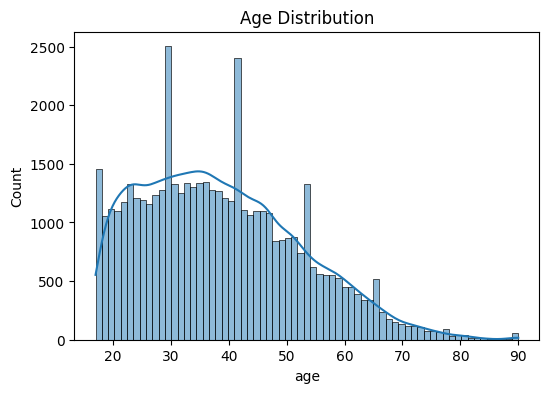

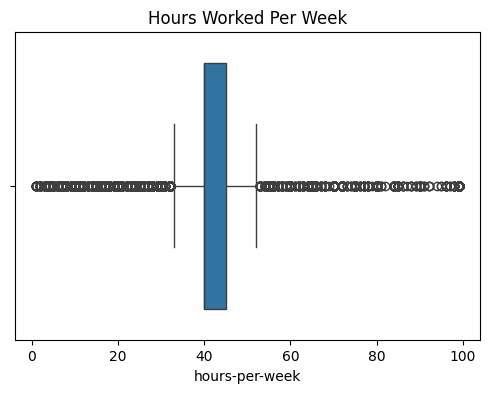

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Load Adult dataset
adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

df.head()

df.describe(include="all")

categorical_features = df.select_dtypes(include=["object"]).columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

categorical_features, numerical_features

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot of hours-per-week
plt.figure(figsize=(6,4))
sns.boxplot(x=df["hours-per-week"])
plt.title("Hours Worked Per Week")
plt.show()

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head()

df_encoded["age_bin"] = pd.cut(df["age"], bins=[0, 25, 45, 65, 100],
                               labels=["Young", "Adult", "Middle-Aged", "Senior"])

df_encoded = pd.get_dummies(df_encoded, columns=["age_bin"], drop_first=True)






In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# The target column is 'class'. We also need to encode remaining
# categorical columns (type 'category') that were missed previously.
X = pd.get_dummies(df_encoded.drop("class", axis=1), drop_first=True)
y = df_encoded["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8587368205548163
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.73      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.86      9769

